<a href="https://colab.research.google.com/github/Laren2121/Tensorflow/blob/master/CNNmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
#HELPER FUNCTION 

#INITIALIZATION WEIGHTS

def init_weights(shape):
  init_random_dist = tf.truncated_normal(shape,stddev=0.1) 
   #grabing weights from random distribution, (we use truncated_normal)
  return tf.Variable(init_random_dist)


In [0]:
#INITIALIZE BIAS

def init_bias(shape):
  init_bias_vals = tf.constant(0.1, shape=shape)
  return tf.Variable(init_bias_vals)

In [0]:
#CONV2D

def conv2d(x,W): 
  #x --> input (shape will be the batch, height, width or channels(RGB))
  #x --> [batch,H,W,Channels]
  #W --> Kernal (which has the dimentions of filter heights, filter width, no of channels coming in and going out)
  #W --> [filter H, filter W, Channels IN, Channels OUT]

  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
  

In [0]:
#POOLING
def max_pool_2by2(x):
  #x --> [batch,H,W,Channels]

  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') 

  #ksize is the size of the window for each dimension of input tensor
  #strides is the stride of the sliding window of each dimention of the input tensor




In [0]:
#CONVOLUTIONAL LAYER
def convolutional_layer(input_x,shape):
  W = init_weights(shape)
  b = init_bias([shape[3]]) #biases run along 3rd dimension
  return tf.nn.relu(conv2d(input_x,W)+b)

In [0]:
#NORMAL LAYER (FULLY CONNECTED LAYER)
def normal_full_layer(input_layer,size):
  input_size = int(input_layer.get_shape()[1])#get the index 1 dimension
  W = init_weights([input_size,size])
  b = init_bias([size])
  return tf.matmul(input_layer,W)+b # it is a normal fully connected layer of the input layer


In [0]:
#PLACEHOLDER
x = tf.placeholder(tf.float32,shape=[None,784]) #image got flattened out 
y = tf.placeholder(tf.float32,shape=[None,10])

In [0]:
#LAYERS
x_image = tf.reshape(x,[-1,28,28,1]) #reshape the flattened out image (28x28 height width and 1 is the gray scale)

In [0]:
convo_1 = convolutional_layer(x_image,shape=[5,5,1,32])#1st convolutional layer

#it is going to compute 32 (output channels) features for 5x5 size(patch), 1 is the input channel (gray scale)

convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
convo_2 = convolutional_layer(convo_1_pooling, shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [0]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024)) #1024 is the number of neurons

In [0]:
#DROP OUT (TO AVOID OVERFITTING)
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred = normal_full_layer(full_one_dropout,10)

#Just practice


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
#Helper functions

#Initialize wieghts
def init_weight(shape):
  init_random_dist = tf.truncated_normal(shape,stddev=0.1)
  return tf.Variable(init_random_dist)

In [0]:
#Initialize bias

def init_bias(shape):
  init_bias_vals = tf.constant(0.1,shape=shape)
  return tf.Variable(init_bias_vals)

In [0]:
#Conv2d
#(return a 2d conv, taking tensor and filter and applying convo)
def conv2d(x,W):
  #x --> [batch, H, W, color channels]
  #W (considered as filter?)--> [filter H, filter W, Channels IN, Channels OUT  ]
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
  #padding same means 0 padding

In [0]:
#Pooling

def max_pool_2by2(x):
  #x --> [batch,h,w,c]
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
  

In [0]:
#CONVOLUTIONAL LAYER(main layer where it goes deeper)

def convolutional_layer(input_x,shape):
  W = init_weight(shape)
  b = init_bias([shape[3]])
  return tf.nn.relu(conv2d(input_x,W)+b)

In [0]:
#Normal (Fully Connected)

def normal_full_layer(input_layer,size):
  input_size = int(input_layer.get_shape()[1])
  W = init_weight([input_size,size])
  b = init_bias([size])
  return tf.matmul(input_layer,W) + b

In [0]:
#Building our CNN

#PLACEHOLDER
x = tf.placeholder(tf.float32,shape=[None,784]) #The input x is falttend out into a 1D array
y_true = tf.placeholder(tf.float32,shape=[None,10])
#here y_true is one hot encoded

In [0]:
#Layers
x_image = tf.reshape(x,[-1,28,28,1])
#Reshape the flattented out image into 2D
convo_1 = convolutional_layer(x_image,shape=[5,5,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [0]:
#DropOut
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)
y_pred = normal_full_layer(full_one_dropout,10)

#CNN Mnist Data using Keras
*This is from sendex*

In [0]:
import tensorflow as tf
#checking the version
tf.__version__

mnist = tf.keras.datasets.mnist #28x28 handwritten dataset

#unpacking the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [0]:
#Building the mode
model = tf.keras.models.Sequential()
#input layer, we need it to be flat
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  

#defining the parameters for training of the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#training the model
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2660 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1075 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0728 - acc: 0.9771


In [0]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0919 - acc: 0.9719
0.09194332154514268 0.9719


In [0]:
model.save('epic_num_reader.model')

In [0]:
new_model1 = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model1.predict(x_test)

In [0]:
print(predictions)

[[2.6519358e-09 1.1753202e-07 2.9098264e-06 ... 9.9997544e-01
  6.0645348e-08 1.0142078e-06]
 [5.2918580e-08 1.8469202e-05 9.9995756e-01 ... 2.9387954e-09
  1.3717981e-06 4.3868406e-10]
 [2.2844270e-07 9.9983919e-01 5.0360700e-06 ... 6.6740286e-05
  4.0590276e-05 6.8465661e-06]
 ...
 [2.2351920e-09 6.3011117e-07 1.4325447e-07 ... 6.2938685e-05
  1.3712611e-06 1.7550132e-05]
 [1.3009066e-05 3.5858871e-09 1.4634864e-08 ... 3.1314482e-07
  5.4657194e-05 4.8820251e-08]
 [1.1107531e-07 6.1292899e-10 5.5659081e-07 ... 1.7096265e-10
  2.2242462e-07 5.6333349e-10]]


In [0]:
import numpy as np

print(np.argmax(predictions[0]))

7


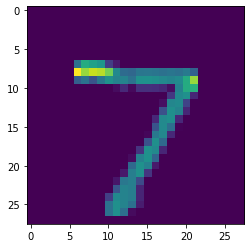

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])